In [ ]:
!pip install google-colab
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00


In [ ]:
import os
drive.mount('/content/drive')

# Żeby działało trzeba mieć na swoim google drive (ścieżka /content/drive/MyDrive/SISI) foldery Testing i Training:
# https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?fbclid=IwAR1jifRrna5JdMzLh4ifE56-mU8pwP9QSf3MQFa2d0CADGfqpcuj7EgTffE

file_path = '/content/drive/MyDrive/SISI'

for dirname, _, filenames in os.walk(file_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m2 (21).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m (152).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m3 (63).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m (119).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m3 (247).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m2 (154).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m (150).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m2 (9).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m3 (137).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m2 (169).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m3 (209).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m (174).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m (48).jpg
/content/drive/MyDrive/SISI/Training/meningioma_tumor/m (126).jpg
/content

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

from sklearn.metrics import classification_report

In [ ]:
X = []
Y = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../content/drive/MyDrive/SISI/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        Y.append(i)

for i in labels:
    folderPath = os.path.join('../content/drive/MyDrive/SISI/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        Y.append(i)

X = np.array(X)
Y = np.array(Y)

# Model CNN dla różnych optimizerów

In [ ]:
X_train,Y_train = shuffle(X,Y,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
# y_train

In [ ]:
# y_test

In [ ]:
# X_train

In [ ]:
# X_test

In [ ]:
#Zamiana labeli glioma_tumor, meningioma_tumor... na 0, 1, 2, 3

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
def build_model(los='categorical_crossentropy', opt='RMSprop', metric=['accuracy']):
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(Conv2D(256,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(512,activation = 'relu'))
  model.add(Dense(512,activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(4,activation='softmax'))

  model.compile(loss=los,optimizer=opt,metrics=metric)

  return model

In [ ]:
def get_classification_metrics(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Obliczanie metryk
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    confusion = confusion_matrix(y_true, y_pred)

    # Tworzenie słownika z wynikami metryk
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Confusion Matrix': confusion
    }

    return metrics

# Sprawdzenie wyników dla różnych optimizerów

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
number_epochs=10
history_model = []
saved_model = []

for i in optimizers:
  model = build_model(opt=i)
  history_model.append(model.fit(X_train,y_train,epochs=number_epochs,validation_split=0.1))
  model.save("model.h{}".format(i))
  saved_model.append(keras.models.load_model("model.h{}".format(i)))

Epoch 1/10
83/83 [==============================] - 13s 105ms/step - loss: 6.5096 - cosine_proximity: 0.2750 - val_loss: 1.4446 - val_cosine_proximity: 0.4777
Epoch 2/10
83/83 [==============================] - 9s 104ms/step - loss: 5.2462 - cosine_proximity: 0.3030 - val_loss: 1.4086 - val_cosine_proximity: 0.4900
Epoch 3/10
83/83 [==============================] - 9s 104ms/step - loss: 4.6804 - cosine_proximity: 0.3060 - val_loss: 1.3843 - val_cosine_proximity: 0.5000
Epoch 4/10
83/83 [==============================] - 8s 101ms/step - loss: 4.2188 - cosine_proximity: 0.3106 - val_loss: 1.3734 - val_cosine_proximity: 0.5048
Epoch 5/10
83/83 [==============================] - 8s 101ms/step - loss: 3.8137 - cosine_proximity: 0.3208 - val_loss: 1.3637 - val_cosine_proximity: 0.5098
Epoch 6/10
83/83 [==============================] - 8s 102ms/step - loss: 3.4122 - cosine_proximity: 0.3346 - val_loss: 1.3586 - val_cosine_proximity: 0.5123
Epoch 7/10
83/83 [==============================] -

Epoch 1/10
83/83 [==============================] - 13s 104ms/step - loss: 1.6979 - cosine_proximity: 0.4848 - val_loss: 1.3673 - val_cosine_proximity: 0.5095
Epoch 2/10
83/83 [==============================] - 8s 102ms/step - loss: 1.3611 - cosine_proximity: 0.5135 - val_loss: 1.3579 - val_cosine_proximity: 0.5142
Epoch 3/10
83/83 [==============================] - 8s 99ms/step - loss: 1.3316 - cosine_proximity: 0.5268 - val_loss: 1.3360 - val_cosine_proximity: 0.5253
Epoch 4/10
83/83 [==============================] - 8s 102ms/step - loss: 1.2745 - cosine_proximity: 0.5528 - val_loss: 1.3020 - val_cosine_proximity: 0.5415
Epoch 5/10
83/83 [==============================] - 8s 101ms/step - loss: 1.2123 - cosine_proximity: 0.5787 - val_loss: 1.2595 - val_cosine_proximity: 0.5620
Epoch 6/10
83/83 [==============================] - 8s 101ms/step - loss: 1.1704 - cosine_proximity: 0.5957 - val_loss: 1.2199 - val_cosine_proximity: 0.5778
Epoch 7/10
83/83 [==============================] - 

KeyboardInterrupt: ignored

In [ ]:
for i in range(0,len(optimizers)):
  print(optimizers[i] + ':')
  metrics = get_classification_metrics(saved_model[i].predict(X_test), y_test)
  accuracy = metrics['Accuracy']
  print("Accuracy:", accuracy)

In [ ]:
plt.figure(figsize=(10,8))
for i in range(0,len(optimizers)):
  plt.plot(history_model[i].history['val_accuracy'])
plt.legend(optimizers)
plt.title("CNN")
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.show()

## Przykładowa predykcja

In [ ]:
# img = cv2.imread('/content/drive/MyDrive/SISI/Testing/no_tumor/image(1).jpg')
# img = cv2.resize(img,(150,150))
# img_array = np.array(img)
# img_array=img_array.reshape(1,150,150,3)

In [ ]:
# a=model.predict(img_array)
# indices = a.argmax()
# indices

In [ ]:
# model.save("model.h1")

In [ ]:
# saved_model=keras.models.load_model("model.h1")

In [ ]:
# a=saved_model.predict(img_array)
# index = a.argmax()
# index

In [ ]:
# if index==0:
#   print("Glioma_tumor")
# elif index==1:
#   print("Meningioma_tumor")
# elif index==2:
#   print("No Tumor")
# elif index==3:
#   print("Pituitary_tumor")

In [ ]:
# plt.imshow(img, cmap='gray')

In [ ]:
# get_classification_metrics(saved_model.predict(X_test), y_test)

# Wykresy

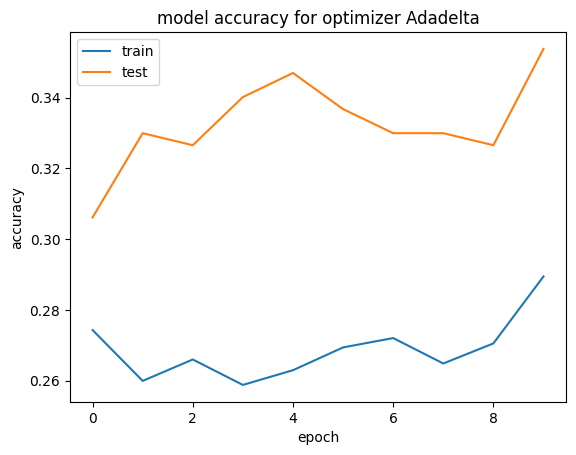

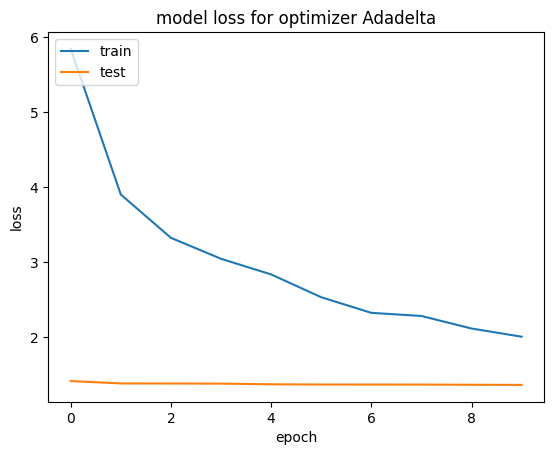

In [ ]:
# summarize history for accuracy
plt.plot(history_model[0].history['accuracy'])
plt.plot(history_model[0].history['val_accuracy'])
plt.title('model accuracy for optimizer Adadelta')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_model[0].history['loss'])
plt.plot(history_model[0].history['val_loss'])
plt.title('model loss for optimizer Adadelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Wizualizacja

1/1 [==============================] - 0s 24ms/step


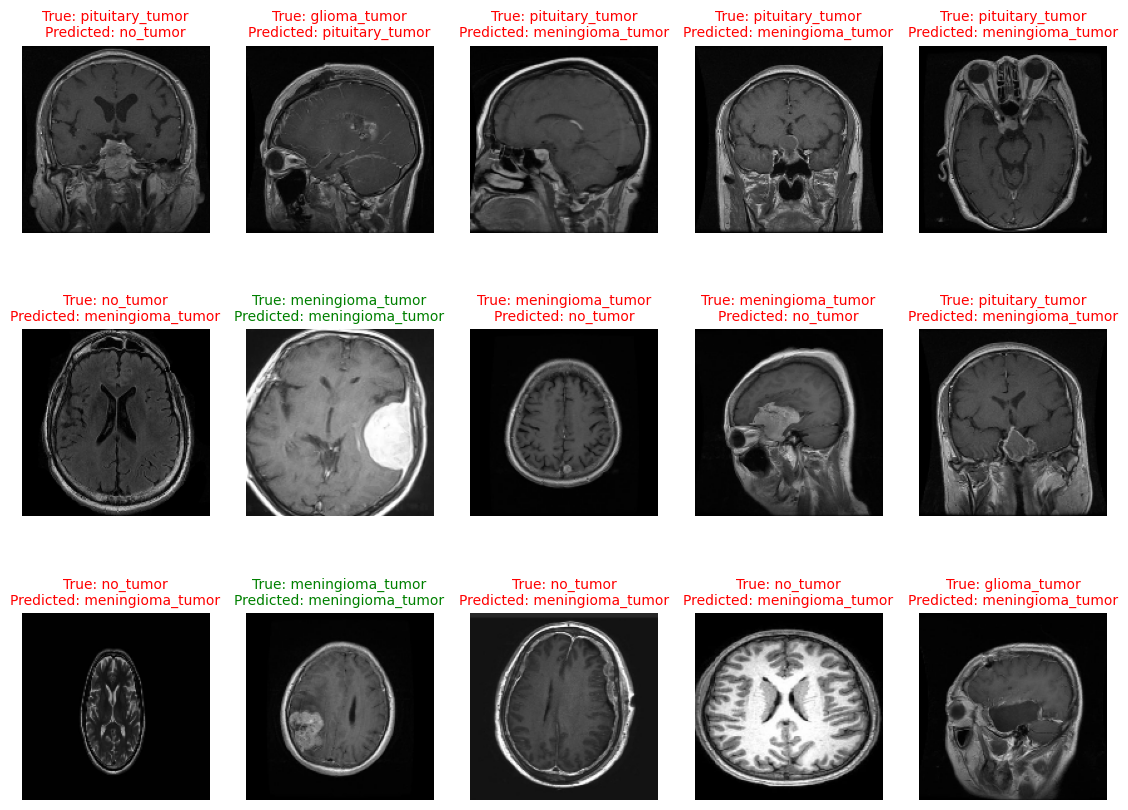

In [ ]:
num_rows = 3
num_cols = 5

indices = np.random.choice(len(X_test), size=15, replace=False)

plt.figure(figsize=(14, 10))

for idx, image_idx in enumerate(indices):
    img = X_test[image_idx]
    true_label_index = np.argmax(y_test[image_idx])
    true_label = labels[true_label_index]
    # dla modelu wytrenowanego wg optimizera 'Adagrad'
    predicted_label = labels[np.argmax(saved_model[0].predict(np.expand_dims(img, axis=0)))]

    plt.subplot(num_rows, num_cols, idx + 1)

    plt.imshow(img)
    plt.axis('off')

    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=title_color, fontsize=10)

plt.subplots_adjust(hspace=0.4)
plt.show()


1/1 [==============================] - 0s 32ms/step


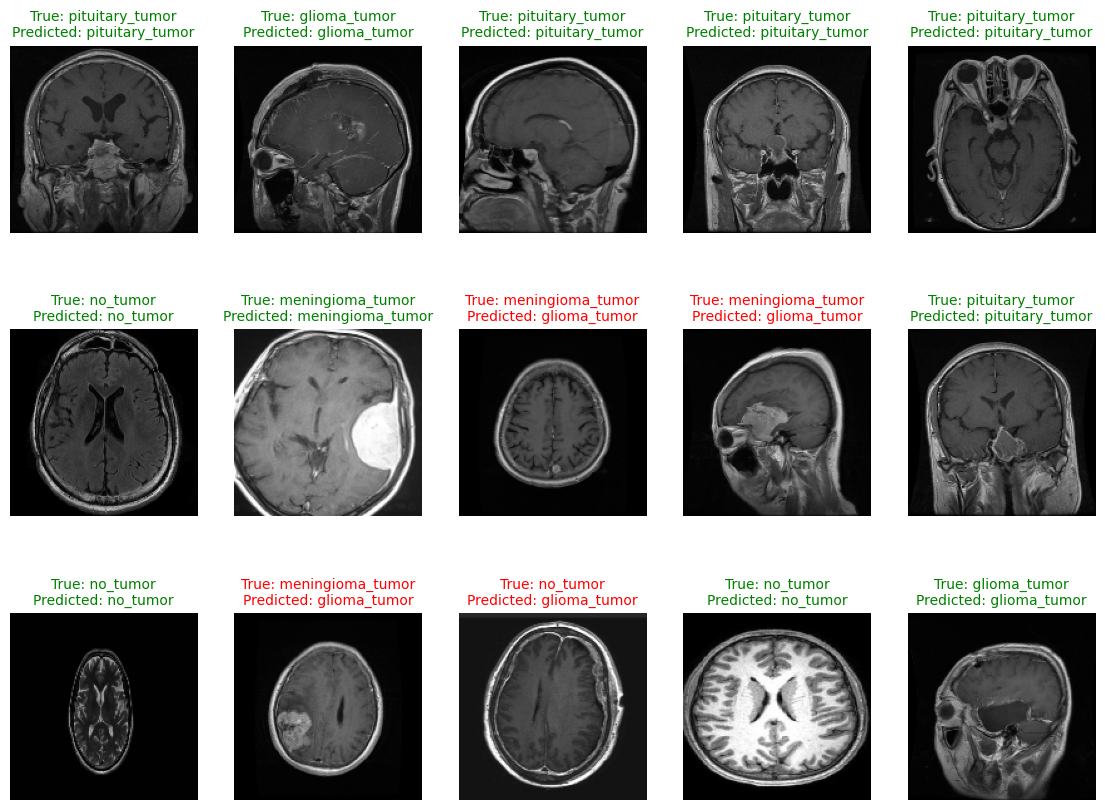

In [ ]:
plt.figure(figsize=(14, 10))

for idx, image_idx in enumerate(indices):
    img = X_test[image_idx]
    true_label_index = np.argmax(y_test[image_idx])
    true_label = labels[true_label_index]
    # dla modelu wytrenowanego wg optimizera 'Adagrad'
    predicted_label = labels[np.argmax(saved_model[-2].predict(np.expand_dims(img, axis=0)))]

    plt.subplot(num_rows, num_cols, idx + 1)

    plt.imshow(img)
    plt.axis('off')

    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=title_color, fontsize=10)

plt.subplots_adjust(hspace=0.4)
plt.show()

# Sprawdzenie wyników dla różnych błędów

In [ ]:
diff_losses = ['mean_squared_error', 'categorical_crossentropy', 'mean_squared_logarithmic_error', 'mean_absolute_error', 'poisson', 'kullback_leibler_divergence']
number_epochs=3
history_model = []
saved_model = []

for i in diff_losses:
  model = build_model(los=i)
  history_model.append(model.fit(X_train,y_train,epochs=number_epochs,validation_split=0.1))
  model.save("model.h{}".format(i))
  saved_model.append(keras.models.load_model("model.h{}".format(i)))

Epoch 1/20
83/83 [==============================] - 13s 98ms/step - loss: 0.3572 - accuracy: 0.2853 - val_loss: 0.3639 - val_accuracy: 0.2721
Epoch 2/20
83/83 [==============================] - 8s 96ms/step - loss: 0.3557 - accuracy: 0.2887 - val_loss: 0.3639 - val_accuracy: 0.2721
Epoch 3/20
83/83 [==============================] - 8s 93ms/step - loss: 0.3557 - accuracy: 0.2887 - val_loss: 0.3639 - val_accuracy: 0.2721
Epoch 4/20
83/83 [==============================] - 8s 95ms/step - loss: 0.3558 - accuracy: 0.2883 - val_loss: 0.3639 - val_accuracy: 0.2721
Epoch 5/20
83/83 [==============================] - 8s 96ms/step - loss: 0.3613 - accuracy: 0.2773 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 6/20
83/83 [==============================] - 8s 97ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 7/20
83/83 [==============================] - 8s 97ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 8/20
8

Epoch 1/20
83/83 [==============================] - 13s 102ms/step - loss: 15.8342 - accuracy: 0.3061 - val_loss: 1.3021 - val_accuracy: 0.3673
Epoch 2/20
83/83 [==============================] - 8s 100ms/step - loss: 1.3222 - accuracy: 0.4158 - val_loss: 1.1764 - val_accuracy: 0.5068
Epoch 3/20
83/83 [==============================] - 8s 98ms/step - loss: 1.1031 - accuracy: 0.5108 - val_loss: 1.0450 - val_accuracy: 0.5646
Epoch 4/20
83/83 [==============================] - 8s 98ms/step - loss: 0.9369 - accuracy: 0.5785 - val_loss: 1.1408 - val_accuracy: 0.6122
Epoch 5/20
83/83 [==============================] - 8s 100ms/step - loss: 0.8126 - accuracy: 0.6406 - val_loss: 0.7967 - val_accuracy: 0.7143
Epoch 6/20
83/83 [==============================] - 8s 99ms/step - loss: 0.7398 - accuracy: 0.6867 - val_loss: 0.9122 - val_accuracy: 0.6190
Epoch 7/20
83/83 [==============================] - 8s 98ms/step - loss: 0.6415 - accuracy: 0.7268 - val_loss: 0.7282 - val_accuracy: 0.7177
Epoch 8/

Epoch 1/20
83/83 [==============================] - 12s 103ms/step - loss: 0.1711 - accuracy: 0.2864 - val_loss: 0.1749 - val_accuracy: 0.2721
Epoch 2/20
83/83 [==============================] - 8s 98ms/step - loss: 0.1710 - accuracy: 0.2883 - val_loss: 0.1749 - val_accuracy: 0.2721
Epoch 3/20
83/83 [==============================] - 8s 98ms/step - loss: 0.1710 - accuracy: 0.2883 - val_loss: 0.1749 - val_accuracy: 0.2721
Epoch 4/20
83/83 [==============================] - 8s 99ms/step - loss: 0.1710 - accuracy: 0.2883 - val_loss: 0.1749 - val_accuracy: 0.2721
Epoch 5/20
83/83 [==============================] - 8s 101ms/step - loss: 0.1710 - accuracy: 0.2883 - val_loss: 0.1749 - val_accuracy: 0.2721
Epoch 6/20
83/83 [==============================] - 8s 101ms/step - loss: 0.1710 - accuracy: 0.2883 - val_loss: 0.1749 - val_accuracy: 0.2721
Epoch 7/20
83/83 [==============================] - 8s 100ms/step - loss: 0.1710 - accuracy: 0.2883 - val_loss: 0.1749 - val_accuracy: 0.2721
Epoch 8/

Epoch 1/20
83/83 [==============================] - 12s 102ms/step - loss: 0.3620 - accuracy: 0.2762 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 2/20
83/83 [==============================] - 8s 98ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 3/20
83/83 [==============================] - 8s 97ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 4/20
83/83 [==============================] - 8s 100ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 5/20
83/83 [==============================] - 8s 99ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 6/20
83/83 [==============================] - 8s 100ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 7/20
83/83 [==============================] - 8s 98ms/step - loss: 0.3615 - accuracy: 0.2770 - val_loss: 0.3605 - val_accuracy: 0.2789
Epoch 8/2

Epoch 1/20
83/83 [==============================] - 11s 101ms/step - loss: 3.1255 - accuracy: 0.2841 - val_loss: 3.1145 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 8s 99ms/step - loss: 3.1391 - accuracy: 0.2830 - val_loss: 3.1145 - val_accuracy: 0.2891
Epoch 3/20
83/83 [==============================] - 8s 98ms/step - loss: 3.1391 - accuracy: 0.2830 - val_loss: 3.1145 - val_accuracy: 0.2891
Epoch 4/20
83/83 [==============================] - 8s 101ms/step - loss: 3.1391 - accuracy: 0.2830 - val_loss: 3.1145 - val_accuracy: 0.2891
Epoch 5/20
83/83 [==============================] - 8s 101ms/step - loss: 3.1391 - accuracy: 0.2830 - val_loss: 3.1145 - val_accuracy: 0.2891
Epoch 6/20
83/83 [==============================] - 8s 100ms/step - loss: 3.1391 - accuracy: 0.2830 - val_loss: 3.1145 - val_accuracy: 0.2891
Epoch 7/20
83/83 [==============================] - 8s 100ms/step - loss: 3.1391 - accuracy: 0.2830 - val_loss: 3.1145 - val_accuracy: 0.2891
Epoch 8

Epoch 1/20
83/83 [==============================] - 13s 100ms/step - loss: 11.4736 - accuracy: 0.2823 - val_loss: 11.7322 - val_accuracy: 0.2721
Epoch 2/20
83/83 [==============================] - 8s 99ms/step - loss: 11.4711 - accuracy: 0.2883 - val_loss: 11.7322 - val_accuracy: 0.2721
Epoch 3/20
83/83 [==============================] - 8s 98ms/step - loss: 11.4711 - accuracy: 0.2883 - val_loss: 11.7322 - val_accuracy: 0.2721
Epoch 4/20
83/83 [==============================] - 8s 101ms/step - loss: 11.4711 - accuracy: 0.2883 - val_loss: 11.7322 - val_accuracy: 0.2721
Epoch 5/20
83/83 [==============================] - 8s 101ms/step - loss: 11.4711 - accuracy: 0.2883 - val_loss: 11.7322 - val_accuracy: 0.2721
Epoch 6/20
83/83 [==============================] - 8s 99ms/step - loss: 11.4711 - accuracy: 0.2883 - val_loss: 11.7322 - val_accuracy: 0.2721
Epoch 7/20
83/83 [==============================] - 8s 100ms/step - loss: 11.4711 - accuracy: 0.2883 - val_loss: 11.7322 - val_accuracy: 0

In [ ]:
for i in range(0,len(diff_losses)):
  print(diff_losses[i] + ':')
  metrics = get_classification_metrics(saved_model[i].predict(X_test), y_test)
  accuracy = metrics['Accuracy']
  print("Accuracy:", accuracy)

mean_squared_error:
11/11 [==============================] - 0s 24ms/step
Accuracy: 0.26605504587155965
categorical_crossentropy:
 1/11 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11/11 [==============================] - 0s 17ms/step
Accuracy: 0.8776758409785933
mean_squared_logarithmic_error:
11/11 [==============================] - 0s 17ms/step
Accuracy: 0.290519877675841
mean_absolute_error:
 1/11 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11/11 [==============================] - 0s 17ms/step
Accuracy: 0.26605504587155965
poisson:
 1/11 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11/11 [==============================] - 0s 17ms/step
Accuracy: 0.28440366972477066
kullback_leibler_divergence:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11/11 [==============================] - 0s 17ms/step
Accuracy: 0.290519877675841


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


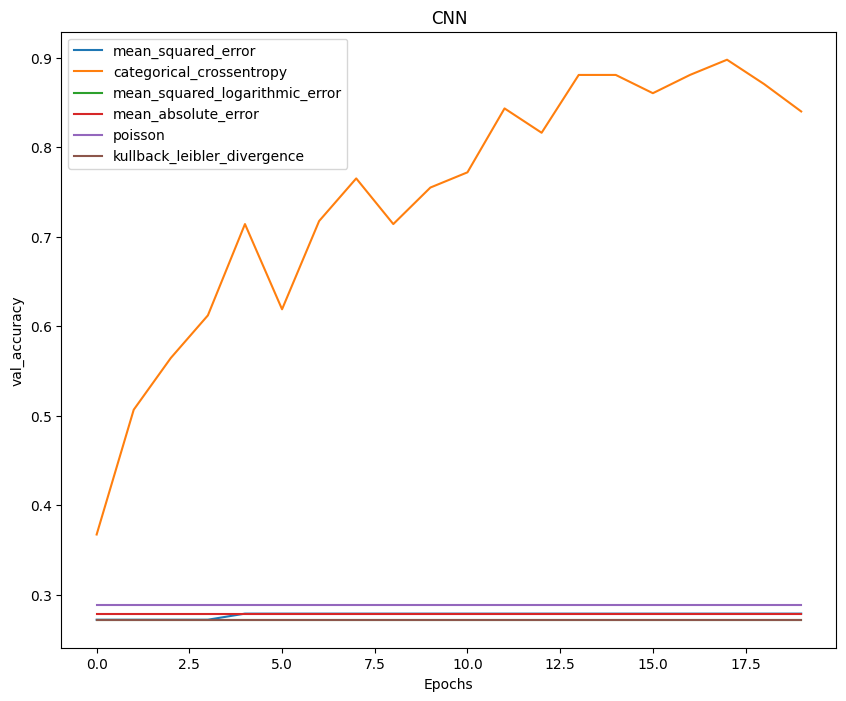

In [ ]:
plt.figure(figsize=(10,8))
for i in range(0,len(diff_losses)):
  plt.plot(history_model[i].history['val_accuracy'])
plt.legend(diff_losses)
plt.title("CNN")
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.show()

# Inny model

# Zamiana na klasyfikację binarną - jest rak czy nie

In [ ]:
# Y_bin = np.where(Y == 'no_tumor', 0, 1)

In [ ]:
# print(np.count_nonzero(Y_bin==1))
# print(np.count_nonzero(Y_bin==0))

In [ ]:
# print(Y_bin.shape)
# print(X.shape)

In [ ]:
# X_train_bin,Y_train_bin = shuffle(X,Y_bin,random_state=101)
# X_train_bin.shape

In [ ]:
# X_train_bin

In [ ]:
# X_train_bin,X_test_bin,Y_train_bin,Y_test_bin = train_test_split(X_train_bin,Y_train_bin,test_size=0.1,random_state=101)

In [ ]:
# print(np.count_nonzero(Y_test_bin==1))
# print(np.count_nonzero(Y_test_bin==0))
# print(np.count_nonzero(Y_train_bin==1))
# print(np.count_nonzero(Y_train_bin==0))

In [ ]:
# Y_test_bin

In [ ]:
# Y_train_bin

In [ ]:
# print(Y_test_bin.shape)
# print(X_test_bin.shape)
# print(Y_train_bin.shape)
# print(X_train_bin.shape)

In [ ]:
# model3 = Sequential()
# model3.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
# model3.add(Conv2D(64,(3,3),activation='relu'))
# model3.add(MaxPooling2D(2,2))
# model3.add(Dropout(0.3))
# model3.add(Conv2D(64,(3,3),activation='relu'))
# model3.add(Conv2D(64,(3,3),activation='relu'))
# model3.add(Dropout(0.3))
# model3.add(MaxPooling2D(2,2))
# model3.add(Dropout(0.3))
# model3.add(Conv2D(128,(3,3),activation='relu'))
# model3.add(Conv2D(128,(3,3),activation='relu'))
# model3.add(Conv2D(128,(3,3),activation='relu'))
# model3.add(MaxPooling2D(2,2))
# model3.add(Dropout(0.3))
# model3.add(Conv2D(128,(3,3),activation='relu'))
# model3.add(Conv2D(256,(3,3),activation='relu'))
# model3.add(MaxPooling2D(2,2))
# model3.add(Dropout(0.3))
# model3.add(Flatten())
# model3.add(Dense(512,activation = 'relu'))
# model3.add(Dense(512,activation = 'relu'))
# model3.add(Dropout(0.3))
# model3.add(Dense(1,activation='sigmoid'))

In [ ]:
# model3.compile(loss= 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
# model3.fit(X_train_bin, Y_train_bin, epochs = 20, validation_split=0.1)

In [ ]:
# model3.save("model.h3")

In [ ]:
# saved_model3=keras.models.load_model("model.h3")

In [ ]:
# def get_classification_metrics(y_true, y_pred):
#     if y_true.ndim > 1:
#         y_true = np.argmax(y_true, axis=1)
#     if y_pred.ndim > 1:
#         y_pred = np.argmax(y_pred, axis=1)

#     # Przekształcanie etykiet na liczby
#     label_mapping = {'yes': 1, 'no': 0}
#     y_true = np.array([label_mapping[label] for label in y_true])
#     y_pred = np.array([label_mapping[label] for label in y_pred])

#     # Obliczanie metryk
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, average='binary')
#     recall = recall_score(y_true, y_pred, average='binary')
#     f1 = f1_score(y_true, y_pred, average='binary')
#     confusion = confusion_matrix(y_true, y_pred)

#     # Przekształcanie macierzy pomyłek z powrotem na etykiety
#     label_reverse_mapping = {1: 'yes', 0: 'no'}
#     confusion_labels = np.array([[label_reverse_mapping[row[0]], label_reverse_mapping[row[1]]] for row in confusion])

#     # Tworzenie słownika z wynikami metryk
#     metrics = {
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1-score': f1,
#         'Confusion Matrix': confusion_labels
#     }

#     return metrics


In [ ]:
# get_classification_metrics(Y_test_bin, saved_model3.predict(X_test_bin))

# JESZCZE RAZ BINARNIE

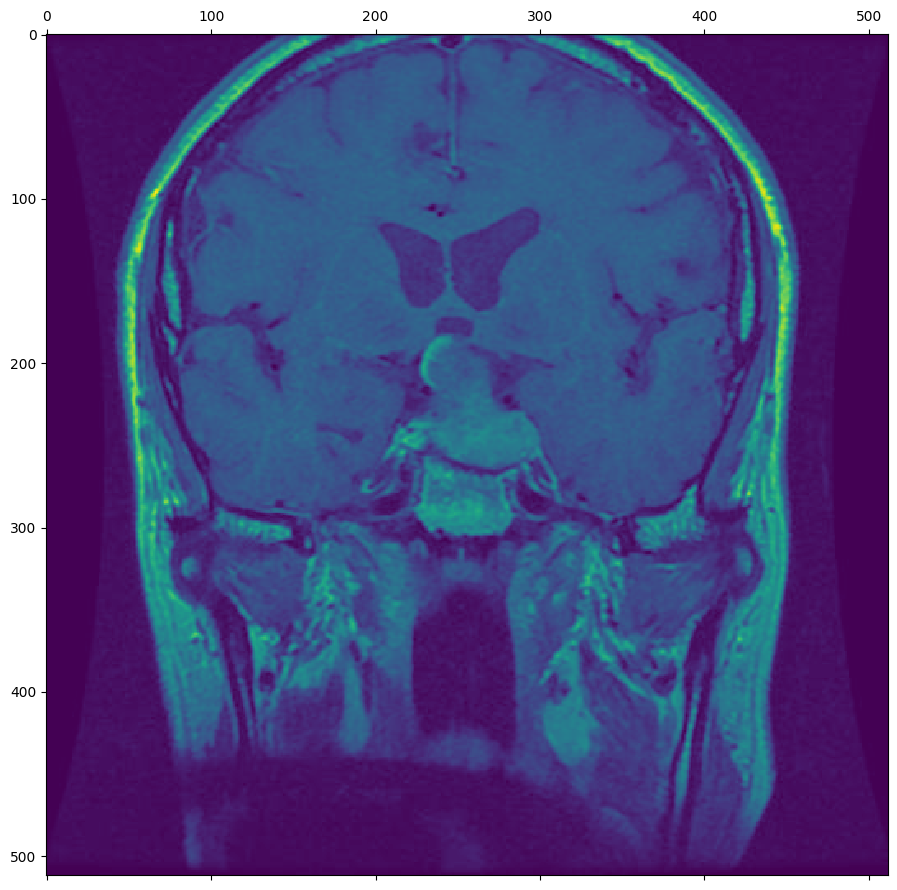

Shape of data_lowres:  (2870, 256, 256)


In [ ]:

Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/Training/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label.append("no")
        else:
            Tumor_Label.append("yes")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

In [ ]:
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
X_train = np.array(X_train, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", X_train.shape)

Shape of data_lowres:  (2937, 150, 150, 3)


In [ ]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

In [ ]:
Tumor_Label

no  yes
0      0    1
1      0    1
2      0    1
3      0    1
4      0    1
...   ..  ...
2865   0    1
2866   0    1
2867   0    1
2868   0    1
2869   0    1

[2870 rows x 2 columns]

In [ ]:
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
print(data_lowres.shape)
print(Tumor_Label.shape)

(2870, 256, 256, 1)
(2870, 2)


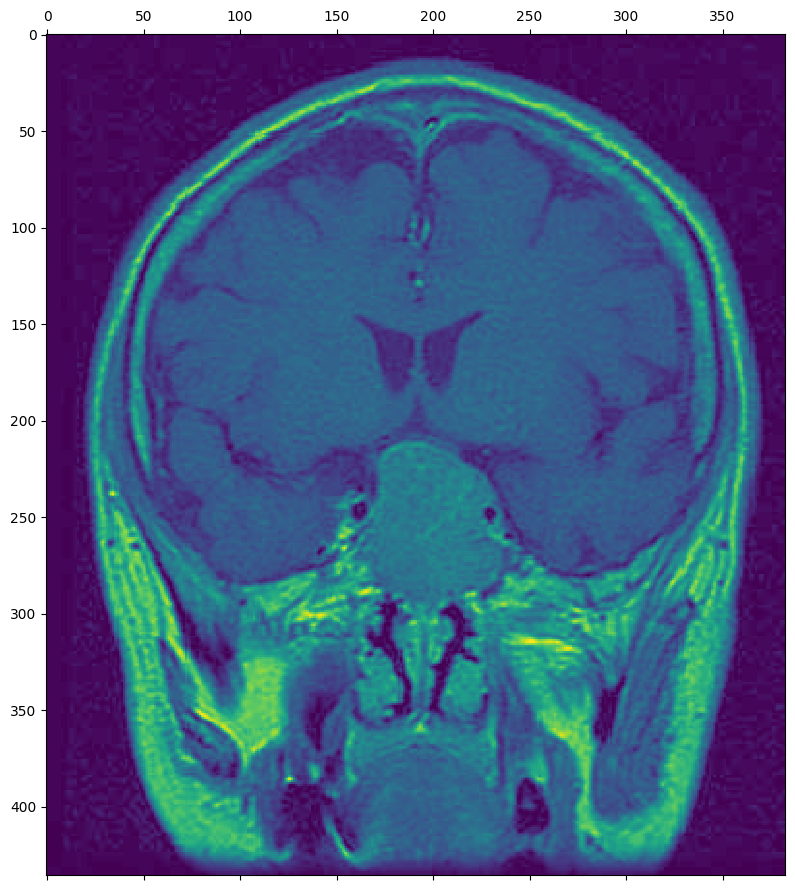

Shape of data_lowres_test:  (394, 256, 256)


In [ ]:
Tumor_Label_test = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths_test=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation =  "../content/drive/MyDrive/SISI/Testing/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths_test=ImagePaths_test+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label_test.append("no")
        else:
            Tumor_Label_test.append("yes")


# Load images and resize to 256 x 256
data_lowres_test=[]
for img in ImagePaths_test:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres_test.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres_test = np.array(data_lowres_test, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres_test: ", data_lowres_test.shape)

In [ ]:
Tumor_Label_test = pd.Series(Tumor_Label_test,name='Tumor_Status')
Tumor_Label_test = pd.get_dummies(Tumor_Label_test)

In [ ]:
Tumor_Label_test

no  yes
0     0    1
1     0    1
2     0    1
3     0    1
4     0    1
..   ..  ...
389   0    1
390   0    1
391   0    1
392   0    1
393   0    1

[394 rows x 2 columns]

In [ ]:
data_lowres_test = data_lowres_test.reshape(-1,256, 256,1)
print(data_lowres_test.shape)
print(Tumor_Label_test.shape)

(394, 256, 256, 1)
(394, 2)


In [ ]:
from tensorflow.keras import layers

def build_model_bin(opt='RMSprop'):
  model = keras.Sequential([

    layers.InputLayer(input_shape=(256, 256,1)),

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),


    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),


    # Fourth Convolutional Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    # Fifth Convolutional Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),



    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    layers.Dense(units=2, activation="sigmoid"),
  ])

  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy'])

  return model

In [ ]:
# from tensorflow.keras import layers

# model5 = keras.Sequential([

#     layers.InputLayer(input_shape=(256, 256,1)),

#     # First Convolutional Block
#     layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
#     layers.MaxPool2D(),
#     layers.Dropout(rate=0.1),
#     layers.BatchNormalization(),


#     # Second Convolutional Block
#     layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
#     layers.MaxPool2D(),
#     layers.Dropout(rate=0.1),
#     layers.BatchNormalization(),

#     # Third Convolutional Block
#     layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
#     layers.MaxPool2D(),
#     layers.Dropout(rate=0.1),
#     layers.BatchNormalization(),


#     # Fourth Convolutional Block
#     layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),
#     layers.MaxPool2D(),
#     layers.Dropout(rate=0.1),
#     layers.BatchNormalization(),

#     # Fifth Convolutional Block
#     layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),
#     layers.MaxPool2D(),
#     layers.Dropout(rate=0.1),
#     layers.BatchNormalization(),



#     # Classifier Head
#     layers.Flatten(),
#     layers.Dense(units=512, activation="relu"),
#     layers.Dropout(rate=0.1),
#     layers.BatchNormalization(),

#     layers.Dense(units=2, activation="sigmoid"),
# ])
# # model5.summary()

In [ ]:
model5 = build_model_bin(opt='Adam')

In [ ]:
model5.fit(data_lowres, Tumor_Label, validation_data = (data_lowres_test, Tumor_Label_test), epochs = 50)

Epoch 1/50
90/90 [==============================] - 33s 166ms/step - loss: 0.4793 - binary_accuracy: 0.8779 - val_loss: 0.8585 - val_binary_accuracy: 0.7335
Epoch 2/50
90/90 [==============================] - 12s 138ms/step - loss: 0.2128 - binary_accuracy: 0.9343 - val_loss: 1.1661 - val_binary_accuracy: 0.7335
Epoch 3/50
90/90 [==============================] - 12s 138ms/step - loss: 0.1676 - binary_accuracy: 0.9402 - val_loss: 1.7333 - val_binary_accuracy: 0.4962
Epoch 4/50
90/90 [==============================] - 13s 139ms/step - loss: 0.1663 - binary_accuracy: 0.9443 - val_loss: 0.9758 - val_binary_accuracy: 0.7449
Epoch 5/50
90/90 [==============================] - 13s 140ms/step - loss: 0.1363 - binary_accuracy: 0.9455 - val_loss: 0.9207 - val_binary_accuracy: 0.7297
Epoch 6/50
90/90 [==============================] - 12s 138ms/step - loss: 0.0867 - binary_accuracy: 0.9672 - val_loss: 0.8885 - val_binary_accuracy: 0.6523
Epoch 7/50
90/90 [==============================] - 13s 14

In [ ]:
loss, accuracy = model5.evaluate(data_lowres_test,Tumor_Label_test)
loss, accuracy

13/13 [==============================] - 0s 25ms/step - loss: 0.5910 - binary_accuracy: 0.8871


(0.5910397171974182, 0.8870558142662048)

In [ ]:
y_pred = np.argmax(model5.predict(data_lowres_test), axis=1)

13/13 [==============================] - 1s 20ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Tumor_Label_test['yes'], y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       105
           1       1.00      0.84      0.92       289

    accuracy                           0.89       394
   macro avg       0.85      0.92      0.87       394
weighted avg       0.92      0.89      0.89       394



In [ ]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(Tumor_Label_test['yes'], y_pred)
print("\nConfusion matrix\n"+str(conf))


Confusion matrix
[[105   0]
 [ 45 244]]


In [ ]:
model5.save("model.h5")

# Ocena dla różnych optimzierów dla binarnego modelu

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
number_epochs=10
history_model_bin = []
saved_model_bin = []

for i in optimizers:
  model = build_model_bin(opt=i)
  history_model_bin.append(model.fit(data_lowres, Tumor_Label, validation_data = (data_lowres_test, Tumor_Label_test),epochs=number_epochs,validation_split=0.1))
  model.save("model.h{}".format(i))
  saved_model_bin.append(keras.models.load_model("model.h{}".format(i)))

Epoch 1/10
90/90 [==============================] - 19s 147ms/step - loss: 0.7964 - binary_accuracy: 0.5774 - val_loss: 0.5921 - val_binary_accuracy: 0.7335
Epoch 2/10
90/90 [==============================] - 13s 141ms/step - loss: 0.7319 - binary_accuracy: 0.6246 - val_loss: 0.5928 - val_binary_accuracy: 0.7335
Epoch 3/10
90/90 [==============================] - 13s 142ms/step - loss: 0.7207 - binary_accuracy: 0.6502 - val_loss: 0.5816 - val_binary_accuracy: 0.7335
Epoch 4/10
90/90 [==============================] - 13s 143ms/step - loss: 0.7023 - binary_accuracy: 0.6662 - val_loss: 0.5949 - val_binary_accuracy: 0.7234
Epoch 5/10
90/90 [==============================] - 13s 143ms/step - loss: 0.6767 - binary_accuracy: 0.6789 - val_loss: 0.5944 - val_binary_accuracy: 0.7246
Epoch 6/10
90/90 [==============================] - 13s 143ms/step - loss: 0.6757 - binary_accuracy: 0.6828 - val_loss: 0.5884 - val_binary_accuracy: 0.7272
Epoch 7/10
90/90 [==============================] - 13s 14

Epoch 1/10
90/90 [==============================] - 19s 154ms/step - loss: 0.6701 - binary_accuracy: 0.6829 - val_loss: 0.6116 - val_binary_accuracy: 0.7335
Epoch 2/10
90/90 [==============================] - 13s 141ms/step - loss: 0.5700 - binary_accuracy: 0.7664 - val_loss: 1.3434 - val_binary_accuracy: 0.2665
Epoch 3/10
90/90 [==============================] - 13s 142ms/step - loss: 0.4979 - binary_accuracy: 0.8141 - val_loss: 1.6601 - val_binary_accuracy: 0.2665
Epoch 4/10
90/90 [==============================] - 13s 141ms/step - loss: 0.4688 - binary_accuracy: 0.8289 - val_loss: 1.8430 - val_binary_accuracy: 0.2665
Epoch 5/10
90/90 [==============================] - 13s 140ms/step - loss: 0.4334 - binary_accuracy: 0.8383 - val_loss: 1.7804 - val_binary_accuracy: 0.2665
Epoch 6/10
90/90 [==============================] - 13s 139ms/step - loss: 0.3953 - binary_accuracy: 0.8707 - val_loss: 2.6769 - val_binary_accuracy: 0.2665
Epoch 7/10
90/90 [==============================] - 13s 14

Epoch 1/10
90/90 [==============================] - 18s 145ms/step - loss: 0.4809 - binary_accuracy: 0.8582 - val_loss: 0.8073 - val_binary_accuracy: 0.7335
Epoch 2/10
90/90 [==============================] - 13s 141ms/step - loss: 0.2084 - binary_accuracy: 0.9364 - val_loss: 0.9031 - val_binary_accuracy: 0.4480
Epoch 3/10
90/90 [==============================] - 13s 142ms/step - loss: 0.1519 - binary_accuracy: 0.9456 - val_loss: 0.5454 - val_binary_accuracy: 0.7373
Epoch 4/10
90/90 [==============================] - 13s 142ms/step - loss: 0.1245 - binary_accuracy: 0.9556 - val_loss: 0.6314 - val_binary_accuracy: 0.7005
Epoch 5/10
90/90 [==============================] - 13s 142ms/step - loss: 0.0867 - binary_accuracy: 0.9695 - val_loss: 0.5405 - val_binary_accuracy: 0.7284
Epoch 6/10
90/90 [==============================] - 13s 141ms/step - loss: 0.0816 - binary_accuracy: 0.9714 - val_loss: 0.9903 - val_binary_accuracy: 0.7360
Epoch 7/10
90/90 [==============================] - 13s 14

Epoch 1/10
90/90 [==============================] - 18s 144ms/step - loss: 0.5231 - binary_accuracy: 0.8495 - val_loss: 1.9178 - val_binary_accuracy: 0.2665
Epoch 2/10
90/90 [==============================] - 13s 140ms/step - loss: 0.2357 - binary_accuracy: 0.9244 - val_loss: 0.8395 - val_binary_accuracy: 0.3033
Epoch 3/10
90/90 [==============================] - 13s 141ms/step - loss: 0.1538 - binary_accuracy: 0.9448 - val_loss: 0.6437 - val_binary_accuracy: 0.6472
Epoch 4/10
90/90 [==============================] - 13s 139ms/step - loss: 0.1165 - binary_accuracy: 0.9589 - val_loss: 0.8007 - val_binary_accuracy: 0.4886
Epoch 5/10
90/90 [==============================] - 12s 139ms/step - loss: 0.0970 - binary_accuracy: 0.9634 - val_loss: 0.7222 - val_binary_accuracy: 0.6421
Epoch 6/10
90/90 [==============================] - 12s 138ms/step - loss: 0.0739 - binary_accuracy: 0.9742 - val_loss: 0.4638 - val_binary_accuracy: 0.7919
Epoch 7/10
90/90 [==============================] - 13s 13

Epoch 1/10
90/90 [==============================] - 16s 149ms/step - loss: 0.5981 - binary_accuracy: 0.7476 - val_loss: 0.8265 - val_binary_accuracy: 0.5025
Epoch 2/10
90/90 [==============================] - 13s 143ms/step - loss: 0.4098 - binary_accuracy: 0.8552 - val_loss: 0.6875 - val_binary_accuracy: 0.5000
Epoch 3/10
90/90 [==============================] - 13s 143ms/step - loss: 0.3238 - binary_accuracy: 0.9052 - val_loss: 1.1790 - val_binary_accuracy: 0.5063
Epoch 4/10
90/90 [==============================] - 13s 142ms/step - loss: 0.2621 - binary_accuracy: 0.9341 - val_loss: 3.2632 - val_binary_accuracy: 0.2665
Epoch 5/10
90/90 [==============================] - 13s 141ms/step - loss: 0.2118 - binary_accuracy: 0.9476 - val_loss: 1.9276 - val_binary_accuracy: 0.2741
Epoch 6/10
90/90 [==============================] - 13s 139ms/step - loss: 0.1793 - binary_accuracy: 0.9605 - val_loss: 2.0441 - val_binary_accuracy: 0.2881
Epoch 7/10
90/90 [==============================] - 13s 14

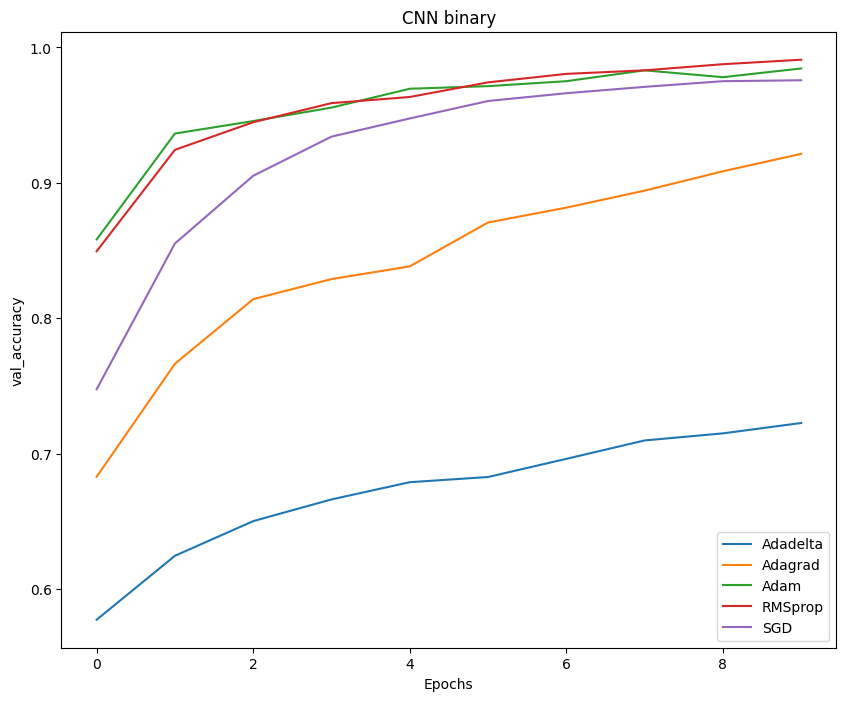

In [ ]:
plt.figure(figsize=(10,8))
for i in range(0,len(optimizers)):
  plt.plot(history_model_bin[i].history['binary_accuracy'])
plt.legend(optimizers)
plt.title("CNN binary")
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.show()

# Testowanie modelu 5 na dwóch innych datasetach

## Inny dataset 1

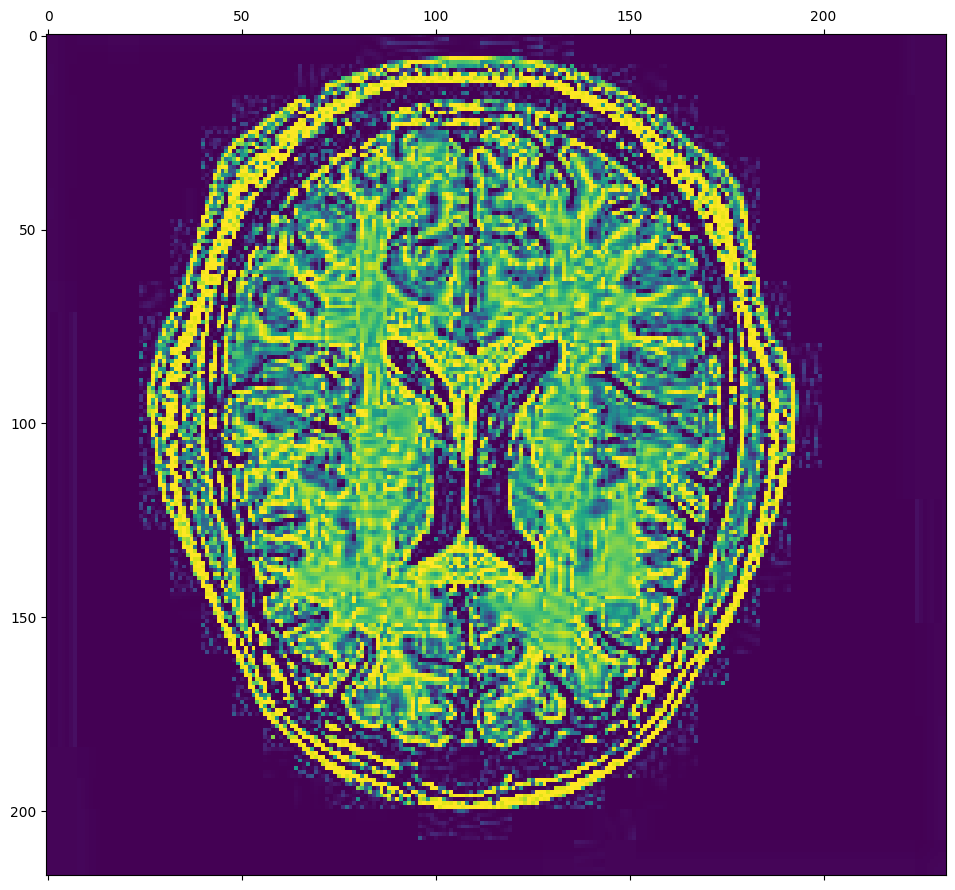

Shape of data_lowres:  (300, 256, 256)


In [ ]:
# dataset z tego linku: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection
import cv2

Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes", "no"]: #Foldery yes no w folderze SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

In [ ]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

In [ ]:
Tumor_Label

no  yes
0     0    1
1     0    1
2     0    1
3     0    1
4     0    1
..   ..  ...
295   1    0
296   1    0
297   1    0
298   1    0
299   1    0

[300 rows x 2 columns]

In [ ]:
data_lowres = data_lowres.reshape(-1,256, 256,1)
print(data_lowres.shape)
print(Tumor_Label.shape)

(300, 256, 256, 1)
(300, 2)


In [ ]:
model = keras.models.load_model("model.h5")

In [ ]:
y_pred = np.argmax(model.predict(data_lowres), axis=1)

10/10 [==============================] - 1s 68ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Tumor_Label['yes'], y_pred))

              precision    recall  f1-score   support

           0       0.60      0.89      0.72       140
           1       0.84      0.47      0.61       160

    accuracy                           0.67       300
   macro avg       0.72      0.68      0.66       300
weighted avg       0.72      0.67      0.66       300



## Inny dataset 2

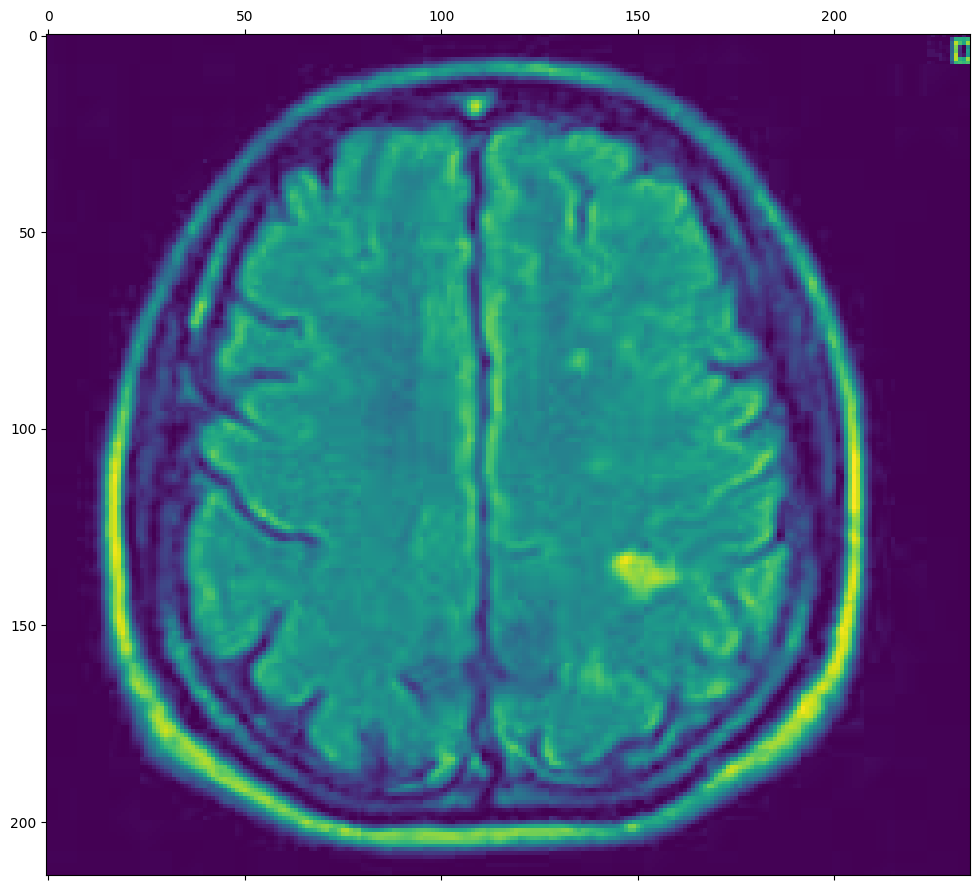

Shape of data_lowres:  (233, 256, 256)


In [ ]:
# dataset z tego linku: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes2", "no2"]: #Foldery yes2 no2 w SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes2":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

In [ ]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
model = keras.models.load_model("model.h5")
y_pred = np.argmax(model.predict(data_lowres), axis=1)
print(classification_report(Tumor_Label['yes'], y_pred))

8/8 [==============================] - 1s 78ms/step
              precision    recall  f1-score   support

           0       0.59      0.96      0.73        98
           1       0.95      0.52      0.67       135

    accuracy                           0.70       233
   macro avg       0.77      0.74      0.70       233
weighted avg       0.80      0.70      0.70       233



## Budowa modelu na jednorodnym datasecie

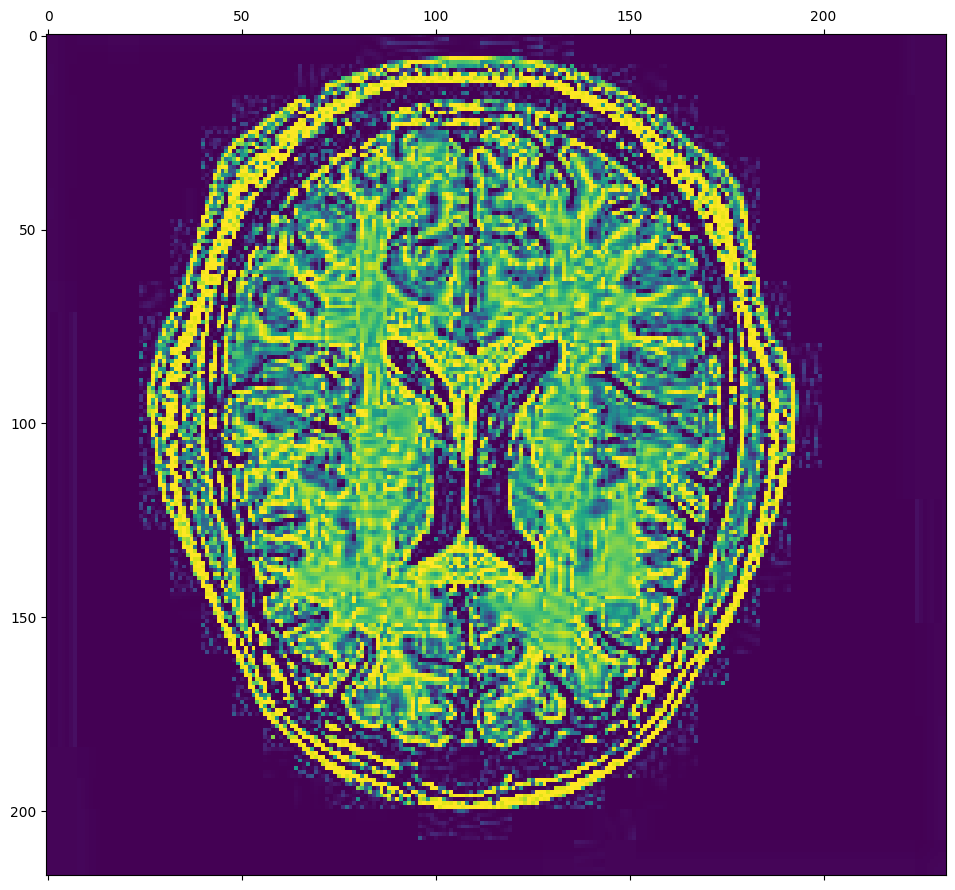

Shape of data_lowres:  (300, 256, 256)


In [ ]:
# dataset z tego linku: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection
import cv2

Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes", "no"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

In [ ]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
data_lowres_train, data_lowres_test, Tumor_Label_train, Tumor_Label_test = train_test_split(data_lowres, Tumor_Label, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import layers

model6 = keras.Sequential([

    layers.InputLayer(input_shape=(256, 256,1)),

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),


    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),


    # Fourth Convolutional Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    # Fifth Convolutional Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),



    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    layers.Dense(units=2, activation="sigmoid"),
])
# model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_66 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_96 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 64, 64, 64)     

In [ ]:
model6.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['binary_accuracy'])

In [ ]:
model6.fit(data_lowres, Tumor_Label, validation_data = (data_lowres_test, Tumor_Label_test), epochs = 20)

Epoch 1/20
10/10 [==============================] - 8s 329ms/step - loss: 0.9258 - binary_accuracy: 0.6950 - val_loss: 0.6536 - val_binary_accuracy: 0.5417
Epoch 2/20
10/10 [==============================] - 1s 137ms/step - loss: 0.4391 - binary_accuracy: 0.8083 - val_loss: 0.8040 - val_binary_accuracy: 0.5167
Epoch 3/20
10/10 [==============================] - 1s 137ms/step - loss: 0.3935 - binary_accuracy: 0.8167 - val_loss: 0.8906 - val_binary_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 1s 137ms/step - loss: 0.3437 - binary_accuracy: 0.8550 - val_loss: 1.7203 - val_binary_accuracy: 0.5167
Epoch 5/20
10/10 [==============================] - 1s 142ms/step - loss: 0.2808 - binary_accuracy: 0.8717 - val_loss: 1.1043 - val_binary_accuracy: 0.5167
Epoch 6/20
10/10 [==============================] - 1s 139ms/step - loss: 0.2658 - binary_accuracy: 0.8800 - val_loss: 0.9991 - val_binary_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 1s 140ms/ste

### Test modelu na innym datasecie

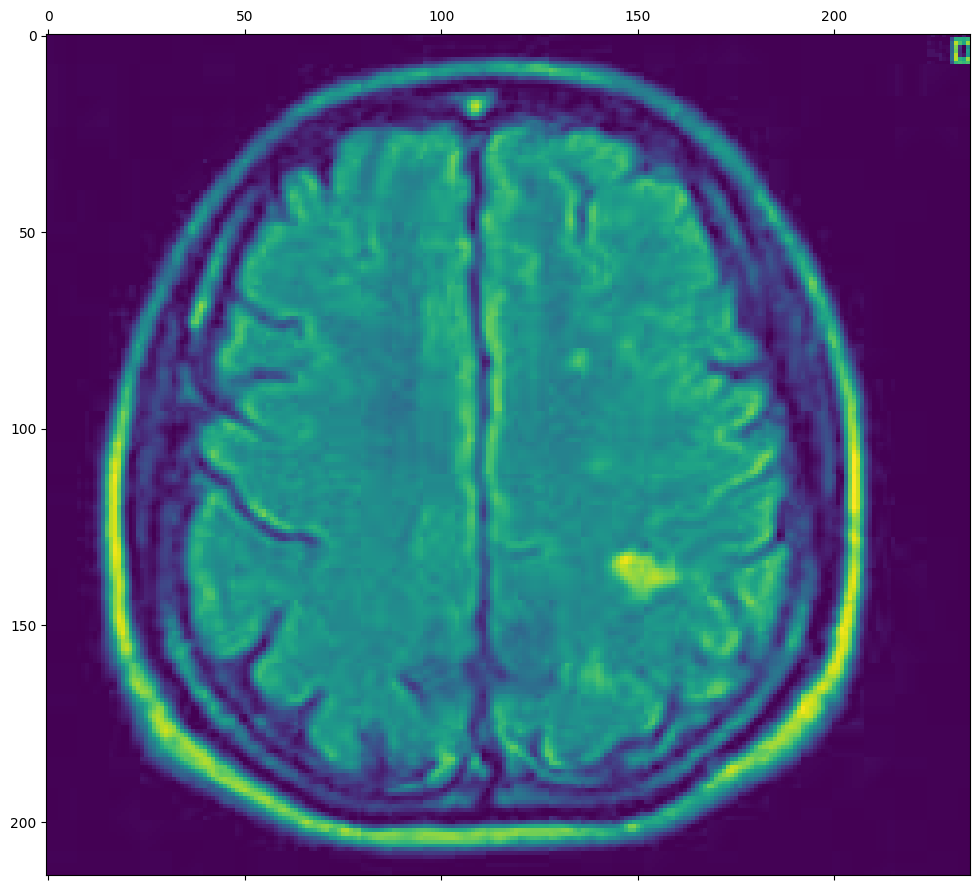

Shape of data_lowres:  (233, 256, 256)


In [ ]:
# dataset z tego linku: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes2", "no2"]: #Foldery yes2 no2 w SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes2":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

In [ ]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
# test na innym datasecie jednorodnym https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
y_pred = np.argmax(model6.predict(data_lowres), axis=1)
print(classification_report(Tumor_Label['yes'], y_pred))

8/8 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        98
           1       0.00      0.00      0.00       135

    accuracy                           0.42       233
   macro avg       0.21      0.50      0.30       233
weighted avg       0.18      0.42      0.25       233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dla zróżnicowanego datasetu

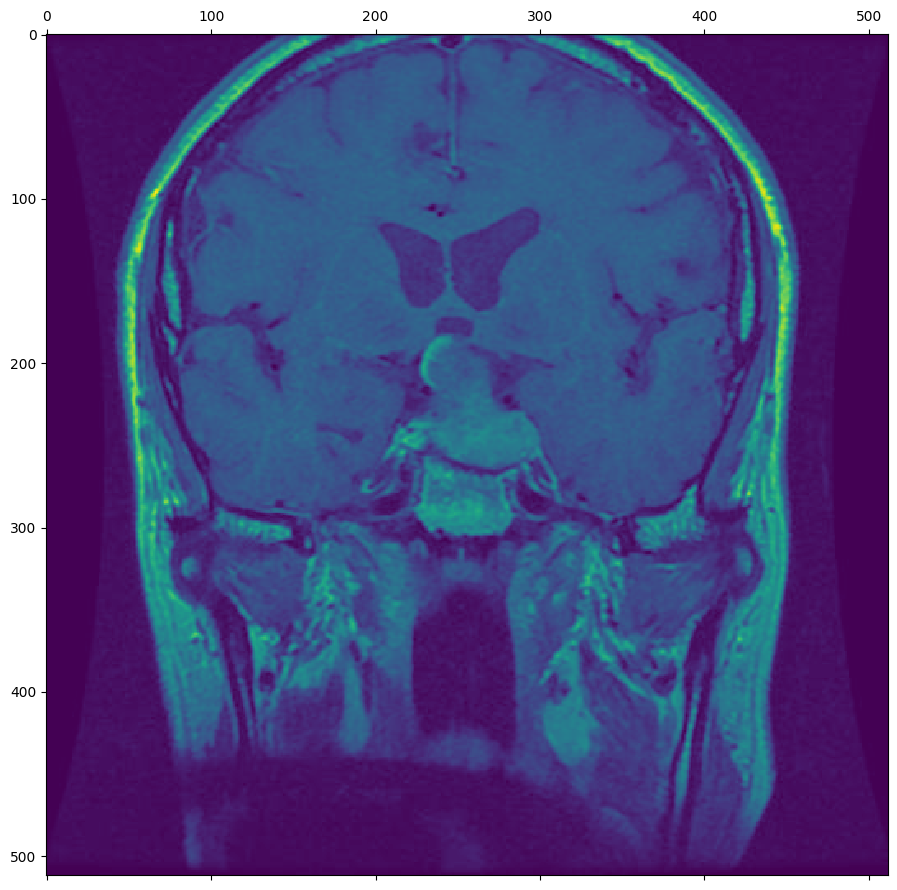

Shape of data_lowres:  (2870, 256, 256)


In [ ]:
Tumor_Label = []
import cv2
# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/Training/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label.append("no")
        else:
            Tumor_Label.append("yes")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

In [ ]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

In [ ]:
data_lowres = data_lowres.reshape(-1,256, 256,1)
print(data_lowres.shape)
print(Tumor_Label.shape)

(2870, 256, 256, 1)
(2870, 2)


In [ ]:
# test na innym datasecie niejednorodnym https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
y_pred = np.argmax(model6.predict(data_lowres), axis=1)
print(classification_report(Tumor_Label['yes'], y_pred))

90/90 [==============================] - 2s 20ms/step
              precision    recall  f1-score   support

           0       0.14      1.00      0.24       395
           1       0.00      0.00      0.00      2475

    accuracy                           0.14      2870
   macro avg       0.07      0.50      0.12      2870
weighted avg       0.02      0.14      0.03      2870



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dla 3ciego data setu https://www.kaggle.com/datasets/mhantor/mri-based-brain-tumor-images

In [ ]:
# dataset z tego linku: https://www.kaggle.com/datasets/mhantor/mri-based-brain-tumor-images

Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes3", "no3"]: #Foldery yes3 no3 w SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes3":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show()

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

FileNotFoundError: ignored

In [ ]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
# test na innym datasecie jednorodnym https://www.kaggle.com/datasets/mhantor/mri-based-brain-tumor-images
y_pred = np.argmax(model6.predict(data_lowres), axis=1)
print(classification_report(Tumor_Label['yes'], y_pred))

# SVM

### Budowa modelu na jednorodnym datasecie
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes", "no"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(3000, 65536)

In [ ]:
data_lowres_train, data_lowres_test, Tumor_Label_train, Tumor_Label_test = train_test_split(data_lowres_2d, Tumor_Label, test_size=0.2, random_state=42)

In [ ]:
Tumor_Label_test['class'] = Tumor_Label_test[['no', 'yes']].idxmax(axis=1)
Tumor_Label_test['class'] = Tumor_Label_test['class'].map({'no': 0, 'yes': 1})
Tumor_Label_test = Tumor_Label_test[['class']]

Tumor_Label_train['class'] = Tumor_Label_train[['no', 'yes']].idxmax(axis=1)
Tumor_Label_train['class'] = Tumor_Label_train['class'].map({'no': 0, 'yes': 1})
Tumor_Label_train = Tumor_Label_train[['class']]

In [ ]:
from sklearn import svm

# Inicjalizacja i trenowanie modelu SVM
model = svm.SVC(kernel='linear')  # Liniowe jądro
model.fit(data_lowres_train, Tumor_Label_train)

# Predykcja na danych testowych
y_pred = model.predict(data_lowres_test)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label_test, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dokładność predykcji: 97.67%


In [ ]:
print(classification_report(Tumor_Label_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       287
           1       0.98      0.97      0.98       313

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



#### Testowanie na innym jednorodnym datasecie
 https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes2", "no2"]: #Foldery yes2 no2 w SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes2":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
data_lowres_2d.shape

(253, 65536)

In [ ]:
# Predykcja na danych testowych
y_pred = model.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 98.81%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.98      1.00      0.99       155

    accuracy                           0.99       253
   macro avg       0.99      0.98      0.99       253
weighted avg       0.99      0.99      0.99       253



#### Testowanie na niejednorodnym datasecie


In [ ]:

Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/Training/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label.append("no")
        else:
            Tumor_Label.append("yes")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(2870, 65536)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
# Predykcja na danych testowych
y_pred = model.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 41.88%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.70      0.25       395
           1       0.89      0.37      0.53      2475

    accuracy                           0.42      2870
   macro avg       0.52      0.54      0.39      2870
weighted avg       0.79      0.42      0.49      2870



### Budowa modelu na niejednorodnym datasecie


In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/Training/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label.append("no")
        else:
            Tumor_Label.append("yes")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(2870, 65536)

In [ ]:
data_lowres_train, data_lowres_test, Tumor_Label_train, Tumor_Label_test = train_test_split(data_lowres_2d, Tumor_Label, test_size=0.2, random_state=42)

In [ ]:
Tumor_Label_test['class'] = Tumor_Label_test[['no', 'yes']].idxmax(axis=1)
Tumor_Label_test['class'] = Tumor_Label_test['class'].map({'no': 0, 'yes': 1})
Tumor_Label_test = Tumor_Label_test[['class']]

Tumor_Label_train['class'] = Tumor_Label_train[['no', 'yes']].idxmax(axis=1)
Tumor_Label_train['class'] = Tumor_Label_train['class'].map({'no': 0, 'yes': 1})
Tumor_Label_train = Tumor_Label_train[['class']]

In [ ]:
n_samples = data_lowres_test.shape[0]
data_lowres_test_2d = data_lowres_test.reshape(n_samples, -1)

In [ ]:
from sklearn import svm

# Inicjalizacja i trenowanie modelu SVM
model2 = svm.SVC(kernel='linear')  # Liniowe jądro
model2.fit(data_lowres_train, Tumor_Label_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
# Predykcja na danych testowych niejednorodnych
y_pred = model2.predict(data_lowres_test_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label_test, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 92.68%


In [ ]:
print(classification_report(Tumor_Label_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.51      0.63        70
           1       0.94      0.98      0.96       504

    accuracy                           0.93       574
   macro avg       0.88      0.75      0.80       574
weighted avg       0.92      0.93      0.92       574



### Testowanie na jednorodnym datasecie
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes", "no"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(3000, 65536)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
Tumor_Label.shape

(3000, 1)

In [ ]:
# Predykcja na danych testowych jednorodnych
y_pred = model2.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 53.27%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58      1500
           1       0.54      0.43      0.48      1500

    accuracy                           0.53      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.53      0.53      0.53      3000



### Testowanie na jednorodnym datasecie
https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes2", "no2"]: #Foldery yes2 no2 w SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes2":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(253, 65536)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
Tumor_Label.shape

(253, 1)

In [ ]:
# Predykcja na danych testowych jednorodnych
y_pred = model2.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 57.71%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60        98
           1       0.78      0.43      0.56       155

    accuracy                           0.58       253
   macro avg       0.63      0.62      0.58       253
weighted avg       0.66      0.58      0.57       253



# Drzewa

### Budowa modelu na jednorodnym datasecie
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes", "no"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(3000, 65536)

In [ ]:
data_lowres_train, data_lowres_test, Tumor_Label_train, Tumor_Label_test = train_test_split(data_lowres_2d, Tumor_Label, test_size=0.2, random_state=42)

In [ ]:
Tumor_Label_test['class'] = Tumor_Label_test[['no', 'yes']].idxmax(axis=1)
Tumor_Label_test['class'] = Tumor_Label_test['class'].map({'no': 0, 'yes': 1})
Tumor_Label_test = Tumor_Label_test[['class']]

Tumor_Label_train['class'] = Tumor_Label_train[['no', 'yes']].idxmax(axis=1)
Tumor_Label_train['class'] = Tumor_Label_train['class'].map({'no': 0, 'yes': 1})
Tumor_Label_train = Tumor_Label_train[['class']]

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf.fit(data_lowres_train, Tumor_Label_train)

y_pred = clf.predict(data_lowres_test)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label_test, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 73.17%


In [ ]:
print(classification_report(Tumor_Label_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       287
           1       0.73      0.76      0.75       313

    accuracy                           0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



#### Testowanie na innym jednorodnym datasecie
 https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes2", "no2"]: #Foldery yes2 no2 w SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes2":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
data_lowres_2d.shape

(253, 65536)

In [ ]:
# Predykcja na danych testowych
y_pred = clf.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 82.61%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        98
           1       0.87      0.84      0.86       155

    accuracy                           0.83       253
   macro avg       0.82      0.82      0.82       253
weighted avg       0.83      0.83      0.83       253



#### Testowanie na niejednorodnym datasecie


In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/Training/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label.append("no")
        else:
            Tumor_Label.append("yes")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(2870, 65536)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
# Predykcja na danych testowych
y_pred = clf.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 36.17%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.57      0.20       395
           1       0.83      0.33      0.47      2475

    accuracy                           0.36      2870
   macro avg       0.47      0.45      0.33      2870
weighted avg       0.73      0.36      0.43      2870



### Budowa modelu na niejednorodnym datasecie


In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/Training/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label.append("no")
        else:
            Tumor_Label.append("yes")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
Tumor_Label.shape

(2870, 2)

In [ ]:
data_lowres_train, data_lowres_test, Tumor_Label_train, Tumor_Label_test = train_test_split(data_lowres_2d, Tumor_Label, test_size=0.2, random_state=42)

In [ ]:
Tumor_Label_test['class'] = Tumor_Label_test[['no', 'yes']].idxmax(axis=1)
Tumor_Label_test['class'] = Tumor_Label_test['class'].map({'no': 0, 'yes': 1})
Tumor_Label_test = Tumor_Label_test[['class']]

Tumor_Label_train['class'] = Tumor_Label_train[['no', 'yes']].idxmax(axis=1)
Tumor_Label_train['class'] = Tumor_Label_train['class'].map({'no': 0, 'yes': 1})
Tumor_Label_train = Tumor_Label_train[['class']]

In [ ]:
clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(data_lowres_train, Tumor_Label_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)

In [ ]:
n_samples = data_lowres_test.shape[0]
data_lowres_test_2d = data_lowres_test.reshape(n_samples, -1)

In [ ]:
# Predykcja na danych testowych niejednorodnych
y_pred = clf2.predict(data_lowres_test_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label_test, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 94.77%


In [ ]:
print(classification_report(Tumor_Label_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77        70
           1       0.96      0.98      0.97       504

    accuracy                           0.95       574
   macro avg       0.90      0.84      0.87       574
weighted avg       0.95      0.95      0.95       574



### Testowanie na jednorodnym datasecie
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes", "no"]:
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(3000, 65536)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
Tumor_Label.shape

(3000, 1)

In [ ]:
# Predykcja na danych testowych jednorodnych
y_pred = clf2.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 61.80%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1500
           1       0.62      0.60      0.61      1500

    accuracy                           0.62      3000
   macro avg       0.62      0.62      0.62      3000
weighted avg       0.62      0.62      0.62      3000



### Testowanie na jednorodnym datasecie
https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [ ]:
Tumor_Label = []

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["yes2", "no2"]: #Foldery yes2 no2 w SISI
    count_tumor_status = 0
    ImgLocation = "../content/drive/MyDrive/SISI/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "yes2":
            Tumor_Label.append("yes")
        else:
            Tumor_Label.append("no")


# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)

# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0

Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [ ]:
n_samples = data_lowres.shape[0]
data_lowres_2d = data_lowres.reshape(n_samples, -1)

In [ ]:
data_lowres_2d.shape

(253, 65536)

In [ ]:
Tumor_Label['class'] = Tumor_Label[['no', 'yes']].idxmax(axis=1)
Tumor_Label['class'] = Tumor_Label['class'].map({'no': 0, 'yes': 1})
Tumor_Label = Tumor_Label[['class']]

In [ ]:
Tumor_Label.shape

(253, 1)

In [ ]:
# Predykcja na danych testowych jednorodnych
y_pred = clf2.predict(data_lowres_2d)

# Sprawdzenie dokładności predykcji
accuracy = accuracy_score(Tumor_Label, y_pred)
print("Dokładność predykcji: {:.2f}%".format(accuracy * 100))

Dokładność predykcji: 60.08%


In [ ]:
print(classification_report(Tumor_Label, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.73      0.59        98
           1       0.75      0.52      0.61       155

    accuracy                           0.60       253
   macro avg       0.62      0.63      0.60       253
weighted avg       0.65      0.60      0.60       253



# PRÓBOWAŁAM - inna sieć

https://github.com/kaledhoshme123/Convolutional-eXtreme-Gradient-Boosting-Brain-Tumor/blob/main/Convolutional_eXtreme_Gradient_Boosting_Brain_Tumor.ipynb

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/sinamhd9/chexnet-weights")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Abort: ignored

In [ ]:
from keras.applications import densenet
from keras.initializers import GlorotNormal

def Model():
    d = densenet.DenseNet121(weights=None, include_top = False, input_shape = (150, 150, 3))
    m = tf.keras.layers.Dropout(0.8)(d.output)
    m = tf.keras.layers.GlobalAveragePooling2D(name = "GlobalAveragePooling2D_")(m)
    m = tf.keras.layers.Dropout(0.8)(m)
    m = tf.keras.layers.Dense(4, kernel_initializer=GlorotNormal(),
                              activation = 'softmax', kernel_regularizer= tf.keras.regularizers.L2(0.0001),
                              bias_regularizer= tf.keras.regularizers.L2(0.0001))(m)
    m = tf.keras.models.Model(inputs = d.input, outputs = m)
    m.load_weights("chexnet-weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5", by_name=True, skip_mismatch=True)
    for layer in m.layers[:200]:
        layer.trainable = False
    for layer in m.layers[200:]:
        layer.trainable = True

    m.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return m

In [ ]:
proba = Model()

In [ ]:
proba.fit(X_train,y_train, epochs = 10, batch_size = 2,
                validation_data = (X_test,y_test),
                callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode = 'min',
                                                  patience= 2),
                             tf.keras.callbacks.EarlyStopping(patience = 14, monitor = 'val_loss', mode = 'min', restore_best_weights=True)])

Epoch 1/10
1469/1469 [==============================] - 346s 224ms/step - loss: 1.8899 - accuracy: 0.2996 - val_loss: 1.0088 - val_accuracy: 0.5780 - lr: 0.0010
Epoch 2/10
1469/1469 [==============================] - 315s 214ms/step - loss: 1.4524 - accuracy: 0.4099 - val_loss: 0.8778 - val_accuracy: 0.6391 - lr: 0.0010
Epoch 3/10
1469/1469 [==============================] - 314s 214ms/step - loss: 1.3866 - accuracy: 0.4324 - val_loss: 0.7805 - val_accuracy: 0.6606 - lr: 0.0010
Epoch 4/10
1469/1469 [==============================] - 311s 211ms/step - loss: 1.2705 - accuracy: 0.4842 - val_loss: 0.6514 - val_accuracy: 0.7187 - lr: 0.0010
Epoch 5/10
1469/1469 [==============================] - 312s 213ms/step - loss: 1.1490 - accuracy: 0.5237 - val_loss: 0.6445 - val_accuracy: 0.7737 - lr: 0.0010
Epoch 6/10
1469/1469 [==============================] - 312s 212ms/step - loss: 1.0268 - accuracy: 0.5931 - val_loss: 0.6436 - val_accuracy: 0.7492 - lr: 0.0010
Epoch 7/10
1469/1469 [============

#Tutaj nie patrzeć to takie zabawy

In [ ]:
#Tutaj nie patrzeć to takie zabawy
#Wyświetlam no_tumory, które zostały zaklasyfikowane jako tumory

import cv2
import numpy as np
from PIL import Image

# Ścieżka do folderu zawierającego zdjęcia
folder_path = '/content/drive/MyDrive/SISI/Testing/no_tumor/'

# Przechowywanie błędnie przewidzianych zdjęć
incorrect_predictions = []

# Przetwarzanie zdjęć
for i in range(2, 102):
    # Wczytanie i przetworzenie obrazu
    file_path = folder_path + f'image({i}).jpg'
    img = cv2.imread(file_path)
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    img_array = img_array.reshape(1, 150, 150, 3)

    # Przewidywanie na pojedynczym obrazie
    a = saved_model.predict(img_array)
    index = a.argmax()

    # Sprawdzenie poprawności predykcji
    if index != 2:#no_tumor
        incorrect_predictions.append((file_path, index))

# Wyświetlanie błędnie przewidzianych zdjęć
for file_path, index in incorrect_predictions:
    if index == 0:
        print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: Glioma_tumor")
        img = Image.open(file_path)
        plt.imshow(img, cmap='gray')
        plt.show()
    elif index == 1:
        print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: Meningioma_tumor")
        img = Image.open(file_path)
        plt.imshow(img, cmap='gray')
        plt.show()
    #elif index == 2:
    #    print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: No Tumor")
    elif index == 3:
        print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: Pituitary_tumor")
        img = Image.open(file_path)
        plt.imshow(img, cmap='gray')
        plt.show()

In [ ]:
#Tutaj nie patrzeć to takie zabawy
#Wyświetlam glioma tumory, które zostały zaklasyfikowane jako no tumory

import cv2
import numpy as np
from PIL import Image

# Ścieżka do folderu zawierającego zdjęcia
folder_path = '/content/drive/MyDrive/SISI/Testing/glioma_tumor/'

# Przechowywanie błędnie przewidzianych zdjęć
incorrect_predictions = []

# Przetwarzanie zdjęć
for i in range(2, 52):
    # Wczytanie i przetworzenie obrazu
    file_path = folder_path + f'image({i}).jpg'
    img = cv2.imread(file_path)
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    img_array = img_array.reshape(1, 150, 150, 3)

    # Przewidywanie na pojedynczym obrazie
    a = saved_model.predict(img_array)
    index = a.argmax()

    # Sprawdzenie poprawności predykcji
    if index != 0:#glioma_tumor
        incorrect_predictions.append((file_path, index))

# Wyświetlanie błędnie przewidzianych zdjęć
for file_path, index in incorrect_predictions:
    #if index == 0:
    #    print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: Glioma_tumor")
    if index == 1:
        print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: Meningioma_tumor")
    elif index == 2:
        print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: No Tumor")
        img = Image.open(file_path)
        plt.imshow(img, cmap='gray')
        plt.show()
    elif index == 3:
        print(f"Nieprawidłowa predykcja dla pliku {file_path}. Przewidziana klasa: Pituitary_tumor")


        # Wyświetlanie obrazu, jeśli jest to wymagane
        #img = Image.open(file_path)
        #plt.imshow(img, cmap='gray')
        #plt.show()